# 🧠 **Understanding ADHD**

### **👩🏻‍🔧 By Rosy**

## 🧐 **Understudied Brains' of Women**

**1. How does menopause affect women's brains?**

**2. Why are women more likely to develop Alzheimer's than men?**  

**3. Why does dementia manifest differently in women versus men?**

**4. The Alzheimer's drug Lepembi slows cognitive decline by 12% in women, compared to 43% in men.** 

## 🎯 **Goals & Tasks:**

**1. Provide insights by means of Data.**

**2. Understanding ADHD in women and children.**

**3. Advancing personalized medicine for neurodevelopmental disorders through an effective model.** 

## ⚖️ **Measurements (Feature Variables):**

#### 1. **Questionnaire:** **The Strength and Difficulties Questionnaire** | **Alabama Parenting Questionnaire**

#### 2. **Clinical Measurements**: **Edinburgh Handedness Inventory** | **Color Vision Test** 


## 💡 **Target Variables:**

1. **ADHD Diagnosis (ADHD_Outcome)** 
2. **Biological Sex (Sex_F)**  

##  🗂️  ***Import Libraries***  

In [1]:
import os

import pandas as pd
import numpy as np

import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp 
sns.set() 

from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings 
warnings.filterwarnings('ignore')  

In [2]:
os.listdir('/kaggle/input/adhd-train-data')   
os.listdir('/kaggle/input/adhd-solutions')  
os.listdir('/kaggle/input/functional-matrices')   

['TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv']

##  ⏳ ***Data Loading & Merging***  

In [3]:
df_quan = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_QUANTITATIVE .xlsx')   
df_cat = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_CATEGORICAL.xlsx') 
df_solu = pd.read_excel('/kaggle/input/adhd-solutions/TRAINING_SOLUTIONS.xlsx')

In [4]:
df = df_quan.merge(df_cat, on='participant_id', how='inner').merge(
                                                                    df_solu, 
                                                                    on='participant_id', 
                                                                    how='inner')

## 🔭 ***Data Exploration (EDA)***  

### 🔍 **1. Info & Dtype of Data**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   EHQ_EHQ_Total                     1200 non-null   float64
 2   ColorVision_CV_Score              1190 non-null   float64
 3   APQ_P_APQ_P_CP                    1201 non-null   float64
 4   APQ_P_APQ_P_ID                    1201 non-null   float64
 5   APQ_P_APQ_P_INV                   1201 non-null   float64
 6   APQ_P_APQ_P_OPD                   1201 non-null   float64
 7   APQ_P_APQ_P_PM                    1201 non-null   float64
 8   APQ_P_APQ_P_PP                    1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems          1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total        1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems        1204 non-null   float64
 12  SDQ_SD

### 🔍 **2.Take a Glimpse of Data**

In [6]:
df.head(5).T   

,0,1,2,3,4
participant_id,00aIpNTbG5uh,00fV0OyyoLfw,04X1eiS79T4B,05ocQutkURd6,06YUNBA9ZRLq
EHQ_EHQ_Total,100.0,92.27,86.67,93.34,0.0
ColorVision_CV_Score,13.0,14.0,14.0,14.0,14.0
APQ_P_APQ_P_CP,3.0,3.0,3.0,3.0,8.0
APQ_P_APQ_P_ID,15.0,12.0,21.0,11.0,12.0
APQ_P_APQ_P_INV,44.0,35.0,37.0,42.0,35.0
APQ_P_APQ_P_OPD,14.0,25.0,18.0,15.0,22.0
APQ_P_APQ_P_PM,20.0,28.0,26.0,20.0,12.0
APQ_P_APQ_P_PP,27.0,30.0,28.0,28.0,24.0
SDQ_SDQ_Conduct_Problems,3.0,5.0,3.0,0.0,6.0


### 🔍 **3. Descriptive Statistics**

In [7]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
EHQ_EHQ_Total,1200.0,59.514750,49.744631,-100.0,46.670000,77.800000,94.470000,100.000000
ColorVision_CV_Score,1190.0,13.419328,2.112830,0.0,14.000000,14.000000,14.000000,14.000000
APQ_P_APQ_P_CP,1201.0,3.819317,1.330348,2.0,3.000000,3.000000,4.000000,12.000000
APQ_P_APQ_P_ID,1201.0,13.337219,3.593562,5.0,11.000000,13.000000,16.000000,28.000000
APQ_P_APQ_P_INV,1201.0,39.767694,4.872729,23.0,36.000000,40.000000,43.000000,50.000000
APQ_P_APQ_P_OPD,1201.0,17.963364,3.333965,7.0,16.000000,18.000000,20.000000,28.000000
APQ_P_APQ_P_PM,1201.0,16.557036,5.146548,5.0,13.000000,16.000000,19.000000,37.000000
APQ_P_APQ_P_PP,1201.0,25.498751,3.053720,13.0,23.000000,26.000000,28.000000,30.000000
SDQ_SDQ_Conduct_Problems,1204.0,2.074751,2.022992,0.0,0.000000,2.000000,3.000000,10.000000
SDQ_SDQ_Difficulties_Total,1204.0,12.213455,6.517330,0.0,7.000000,12.000000,17.000000,34.000000


### 🔍 **4. Dimensions of DataFrame**

In [8]:
print(f'Rows: {df.shape[0]}') 
print(f'Colums: {df.shape[1]}')     

Rows: 1213
Colums: 30


### 🔍 **5. Check Duplicated & Missing Values** 

In [9]:
print(f'Duplicated: {df.duplicated().sum()}') 

Duplicated: 0


In [10]:
missing_counts = df.isnull().sum() 
missing_values = pd.DataFrame({'No. of Missing Values': missing_counts[missing_counts>0].sort_values(ascending=False),
                               '% of Missing Values': (missing_counts[missing_counts>0]/len(df)*100).sort_values(ascending=False)}) 

missing_values.index.name = 'Features'

missing_values.style.background_gradient('magma')   

,No. of Missing Values,% of Missing Values
Features,,
MRI_Track_Age_at_Scan,360,29.678483
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
ColorVision_CV_Score,23,1.896125
Barratt_Barratt_P1_Edu,15,1.236603
EHQ_EHQ_Total,13,1.071723


### 🔍 **6. Looking for Correlations**

In [11]:
df.drop('participant_id', axis=1, inplace=True) 

<Axes: >

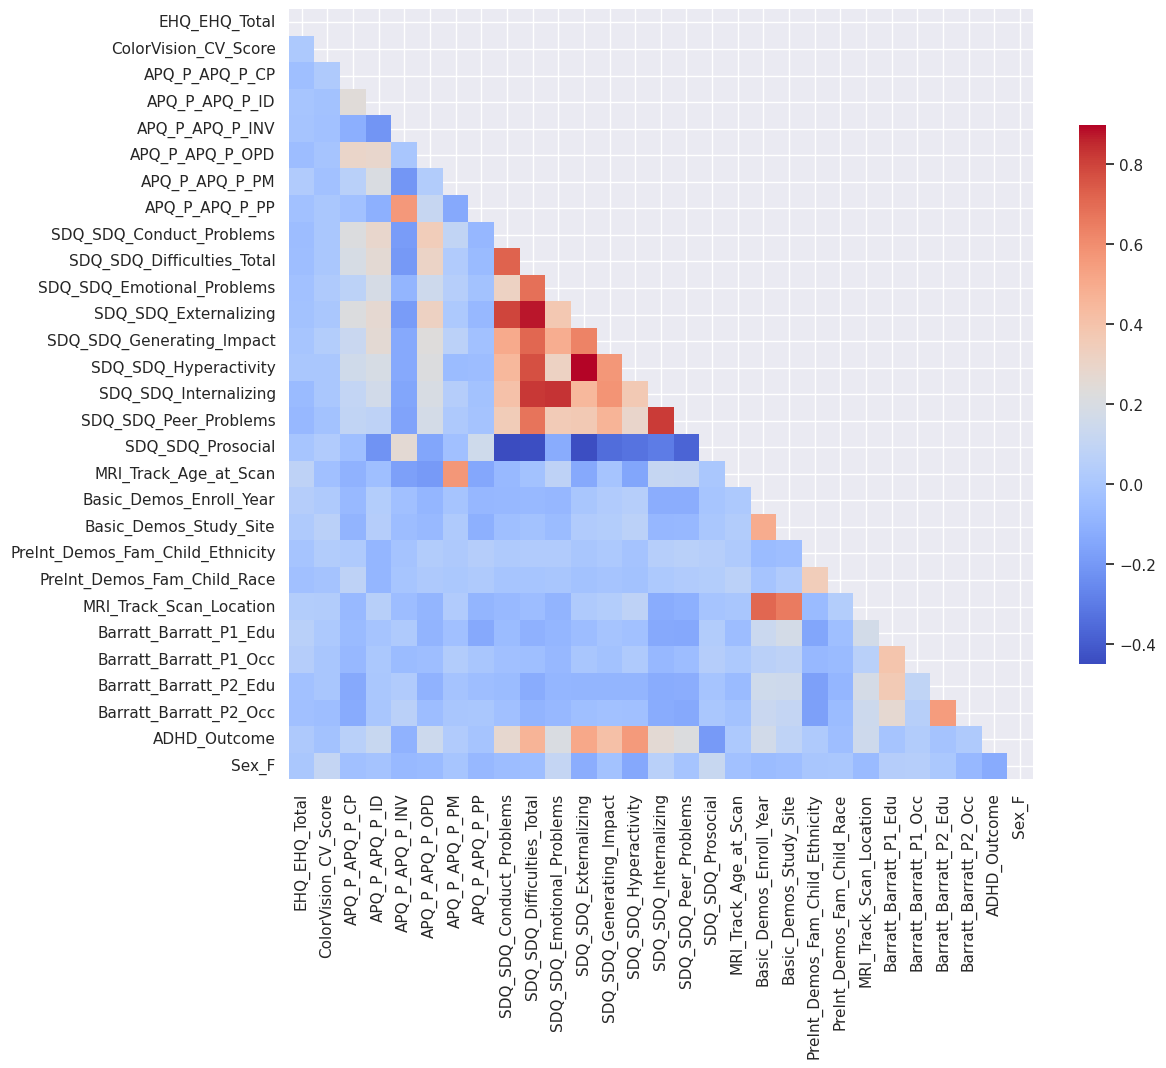

In [12]:
corr_matrix = df.corr() 

mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix,
            mask=mask,
            cmap='coolwarm',
            cbar_kws={"shrink": .7})    

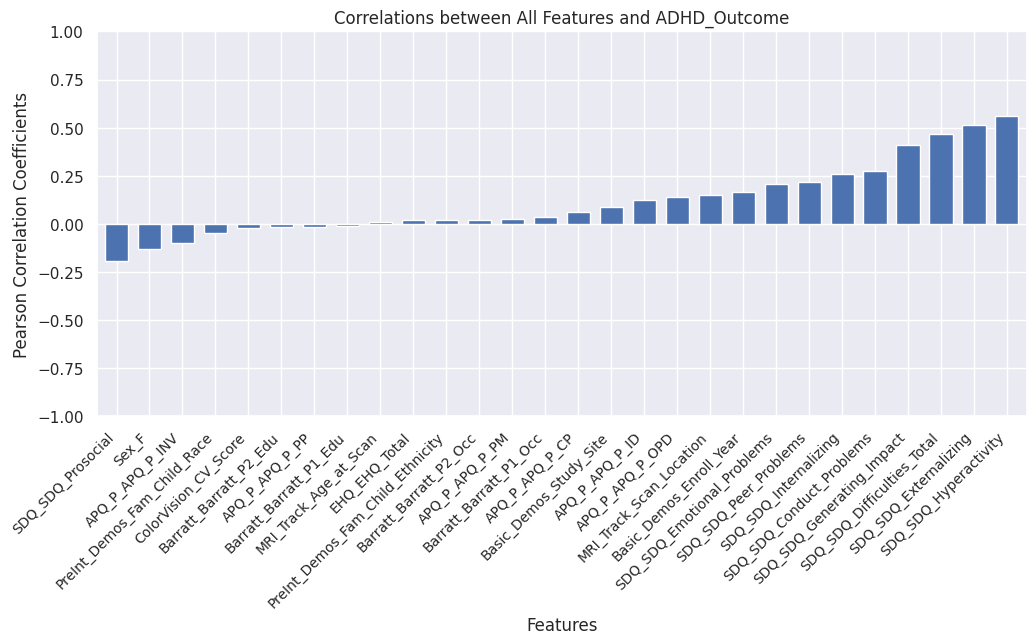

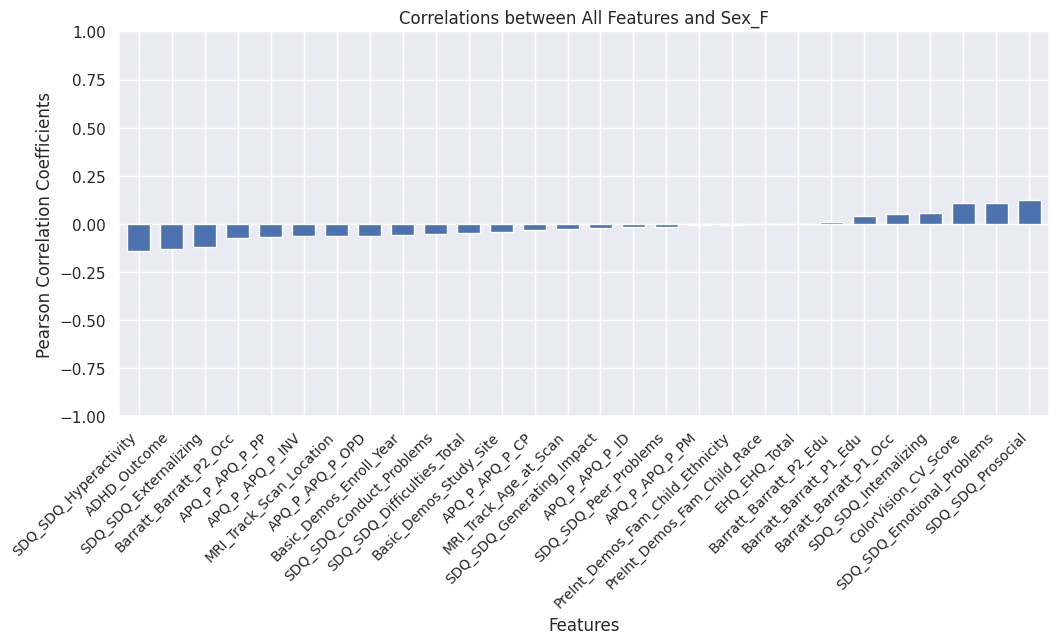

In [13]:
target_cols = ['ADHD_Outcome', 'Sex_F'] 

for col in target_cols:
    correlations = corr_matrix[col].drop([col]).sort_values()  
    fig = plt.figure(figsize=(12,5)) 
    ax = correlations.plot(kind='bar', width=0.7) 

    ax.set(ylim=[-1, 1]) 
    ax.set(ylabel='Pearson Correlation Coefficients',
           xlabel= 'Features')
    
    ax.set_xticklabels(correlations.index, 
                       rotation=45,
                       ha='right',
                       fontsize=10) 
    
    ax.set_title(f'Correlations between All Features and {col}')   

##  🔨***Data Cleaning & Preprocessing***  

### 🔍 **1. Visualization Distribution & Correlation of Missing Values**

<Axes: >

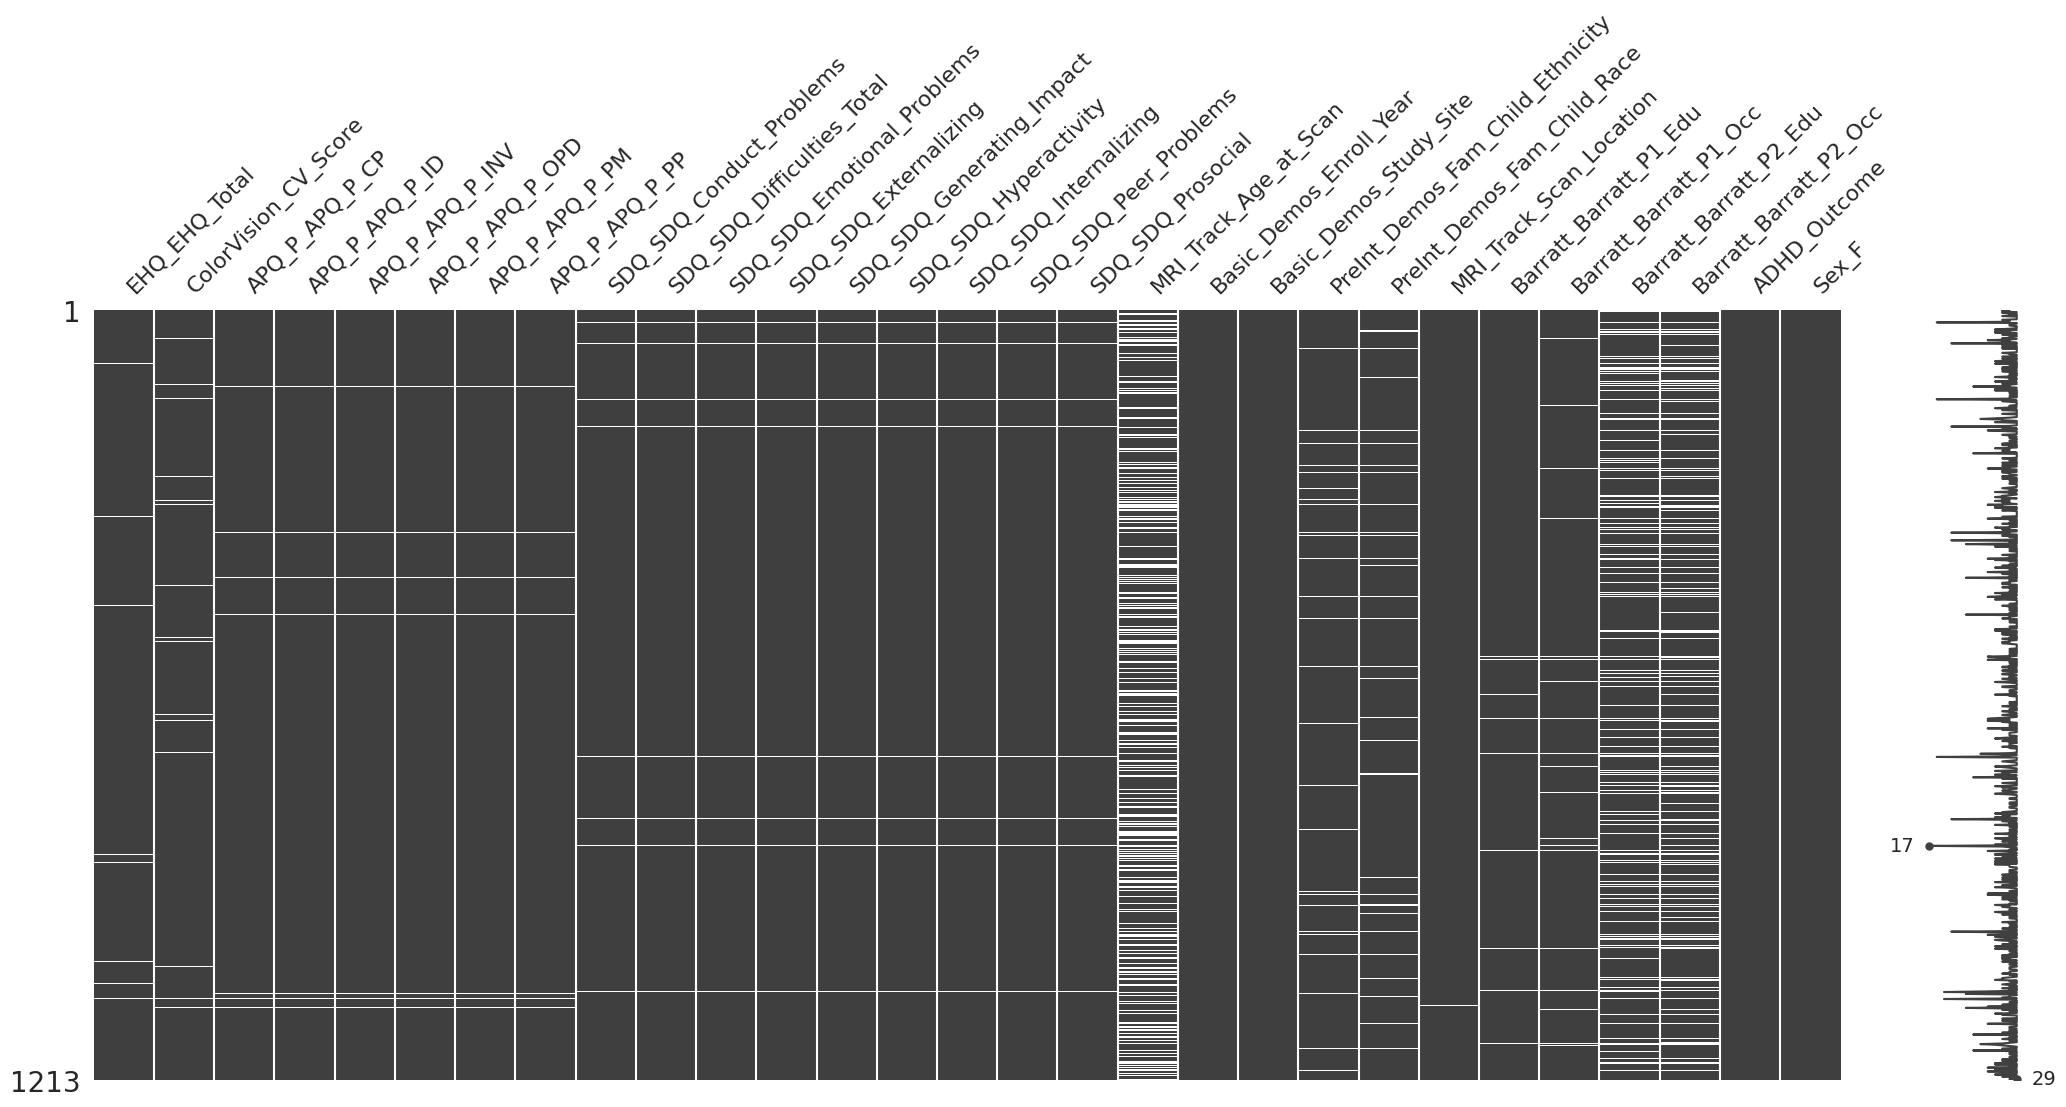

In [14]:
import missingno as msno


msno.matrix(df)  

### 📝 Summary: 

* **MCAR: The missing values in Columns: MRI_Track_Age_at_Scan, EHQ_EHQ_Total, ColorVision_CV_Score showed completely random.**

* **MAR:**

  **1. The Missing Values of all columns in APQ & SDQ are missing at random(missing values depend on observed data)**

  **2.The Missing Values in PreInt_Demos_Fam_Child_Ethnicity depends on PreInt_Demos_Fam_Child_Race.**

  **3.The Missing Values in Barratt_Barratt_P1_Edu depends on Barratt_Barratt_P1_Occ.(P2 the same)** 

  

<Axes: >

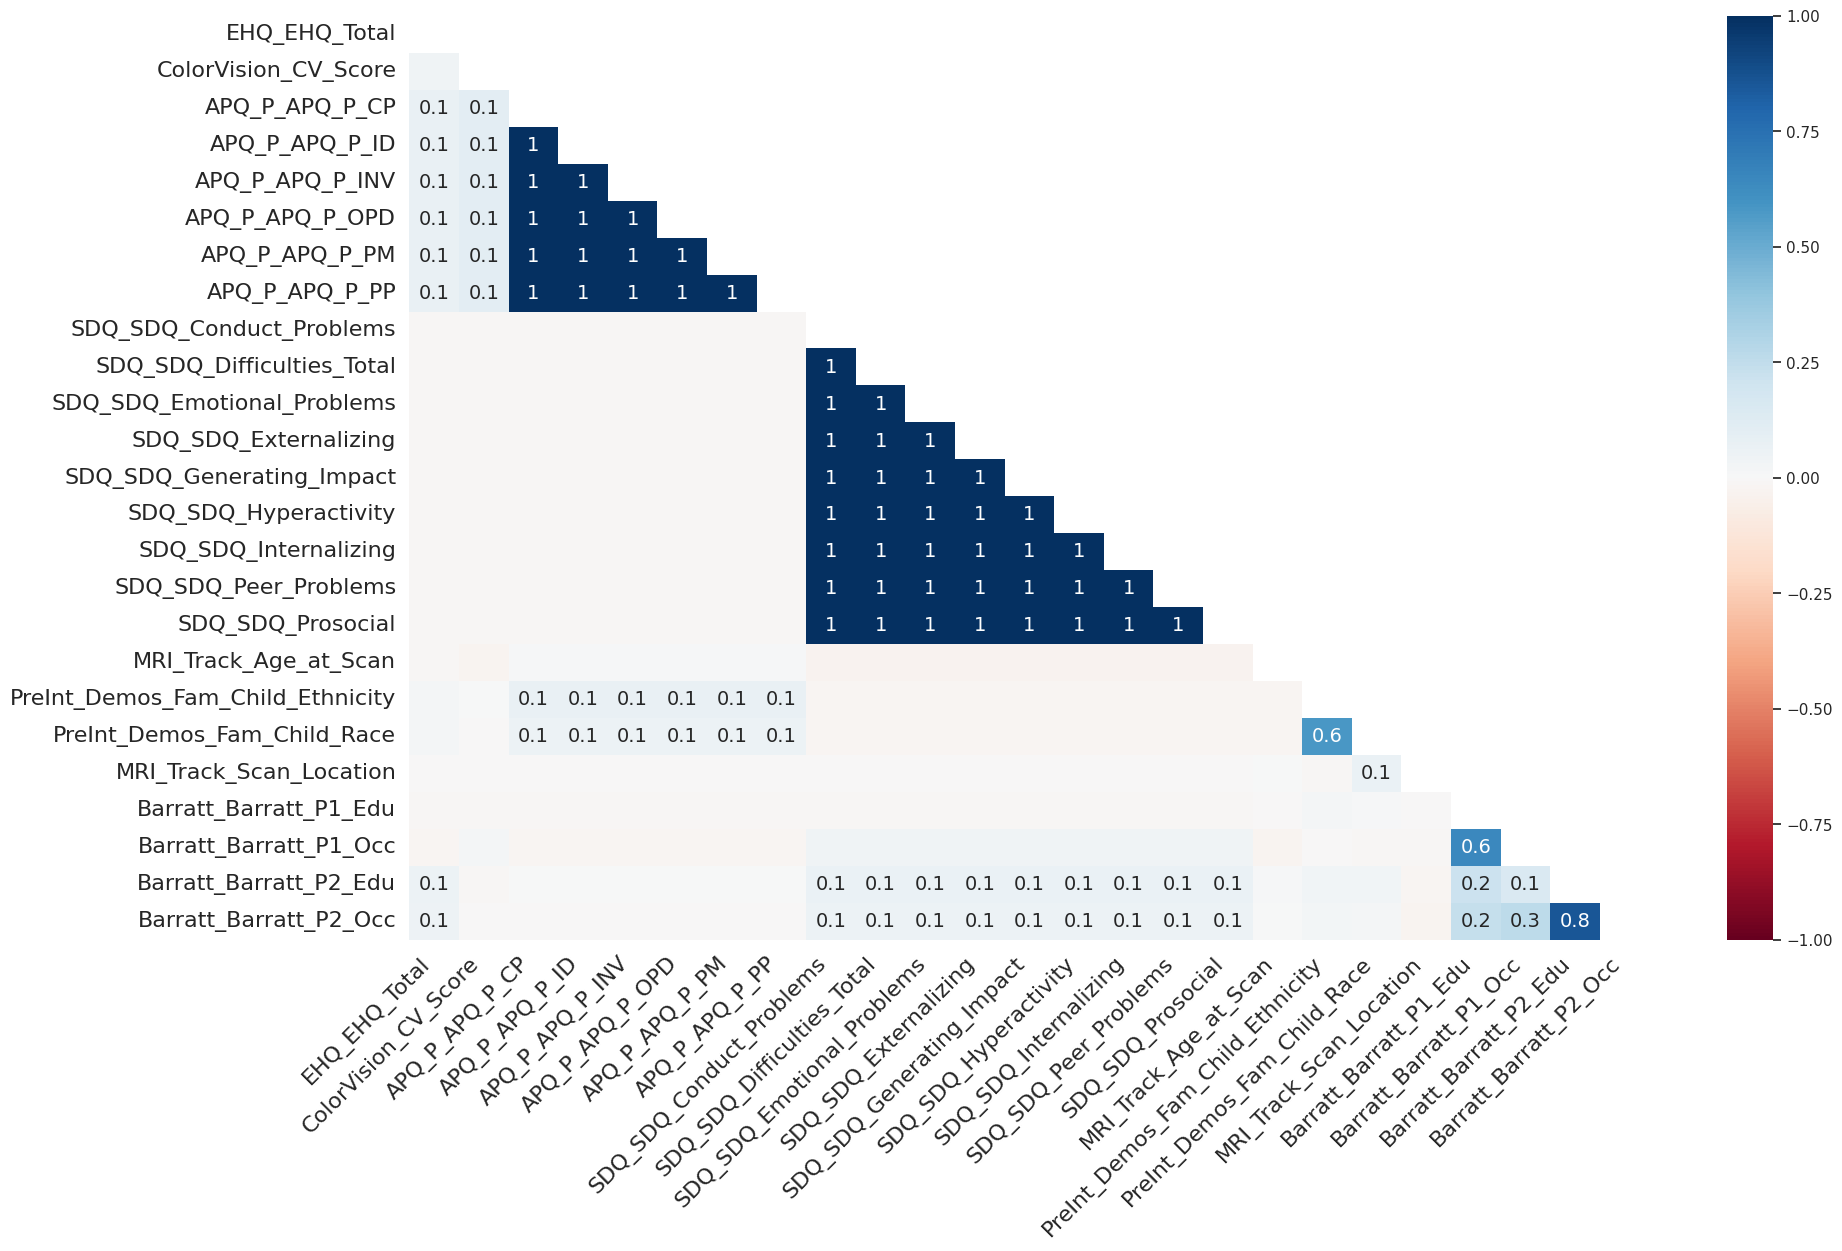

In [15]:
msno.heatmap(df) 

### 📝 Summary: 

* ...
* ...

### 🔍 **2. Deal with MCAR**

* **MRI_Track_Age_at_Scan, EHQ_EHQ_Total, and ColorVision_CV_Score exhibited completely random missing values, with missing percentages of 29.678%, 1.072%, 1.896% respectively.**

*  **The missing values in MRI_Track_Age_at_Scan accounts for large percentage.-->

    **1. fill in Null with Global Median(avoiding overfitting resulted by Group Median, and the Group Median may not stand for the true values since there are two many missing values.)**

   **2.The std in MRI_Track_Age_at_Scan is 3.23 whcih is small.-->** 

* **Fill in with Global median for the missing values.**   


In [16]:
# indicate the missing values: 

df['MRI_Track_Age_at_Scan_missing'] = df['MRI_Track_Age_at_Scan'].isnull().astype(int)   

In [17]:
fill_median_cols = ['MRI_Track_Age_at_Scan', 'EHQ_EHQ_Total', 'ColorVision_CV_Score']

def fill_in_median(df, cols):
    for col in cols: 
            df[col].fillna(df[col].median(), inplace=True) 
    return df  

fill_in_median(df, fill_median_cols)   

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F,MRI_Track_Age_at_Scan_missing
0,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,...,1.0,0.0,3.0,21.0,45.0,NaN,NaN,1,0,0
1,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,...,0.0,9.0,2.0,21.0,0.0,21.0,45.0,1,0,1
2,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,...,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,0
3,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,...,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,1,0
4,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,...,0.0,1.0,2.0,12.0,0.0,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,...,1.0,1.0,3.0,12.0,NaN,15.0,5.0,0,1,0
1209,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,...,0.0,0.0,3.0,21.0,40.0,21.0,40.0,1,0,0
1210,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,...,2.0,3.0,3.0,21.0,40.0,21.0,35.0,1,1,0
1211,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,...,0.0,1.0,3.0,18.0,35.0,18.0,45.0,1,0,1


### 🔍 **3. Deal with Missing Values in SDQ & APQ**

* **They are all quantitative variables but in essence are ordinal categorical(Likert_Scale).**
  * ** 
* **All columns of APQ have 12 missing values, accounting of 0.989% of whole dataframe respectively, and 9 missing values in all columns in SDQ with percentage of 0.742% respectively.**

  * **
* **In Summary: Ordinal Categorical + Percentage of Missing Values is very small --> Mode Imputation.**
  
  * **
* **The columns in SDQ and APQ have correlations with target variables (from heatmap) --> fill in Local mode imputation with group by 'ADHD_Outcome' and 'Sex_F'.**  

In [18]:
target_cols = ['ADHD_Outcome', 'Sex_F'] 

def fill_in_na_mode(df,cols):
    for col in cols:
        df[col] = df.groupby(target_cols)[col].transform(lambda x: x.fillna(x.mode()[0]))
    return df 

sdq_cols = [col for col in df.columns if col.startswith('SDQ')] 
apq_cols= [col for col in df.columns if col.startswith('APQ')]   

fill_in_na_mode(df, sdq_cols) 
fill_in_na_mode(df, apq_cols)       

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F,MRI_Track_Age_at_Scan_missing
0,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,...,1.0,0.0,3.0,21.0,45.0,NaN,NaN,1,0,0
1,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,...,0.0,9.0,2.0,21.0,0.0,21.0,45.0,1,0,1
2,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,...,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,0
3,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,...,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,1,0
4,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,...,0.0,1.0,2.0,12.0,0.0,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,...,1.0,1.0,3.0,12.0,NaN,15.0,5.0,0,1,0
1209,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,...,0.0,0.0,3.0,21.0,40.0,21.0,40.0,1,0,0
1210,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,...,2.0,3.0,3.0,21.0,40.0,21.0,35.0,1,1,0
1211,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,...,0.0,1.0,3.0,18.0,35.0,18.0,45.0,1,0,1


### 🔍 **4. Handling Categorical Attributes** 

In [19]:
missing_counts = df.isnull().sum() 

missing_values = pd.DataFrame({'No. of Missing Values(Cat)': missing_counts[missing_counts>0].sort_values(ascending=False),
                               '% of Missing Values(Cat)': (missing_counts[missing_counts>0] / len(df)*100).sort_values(ascending=False)}) 

missing_values.style.background_gradient('magma')

,No. of Missing Values(Cat),% of Missing Values(Cat)
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
Barratt_Barratt_P1_Edu,15,1.236603
MRI_Track_Scan_Location,3,0.247321


<Axes: >

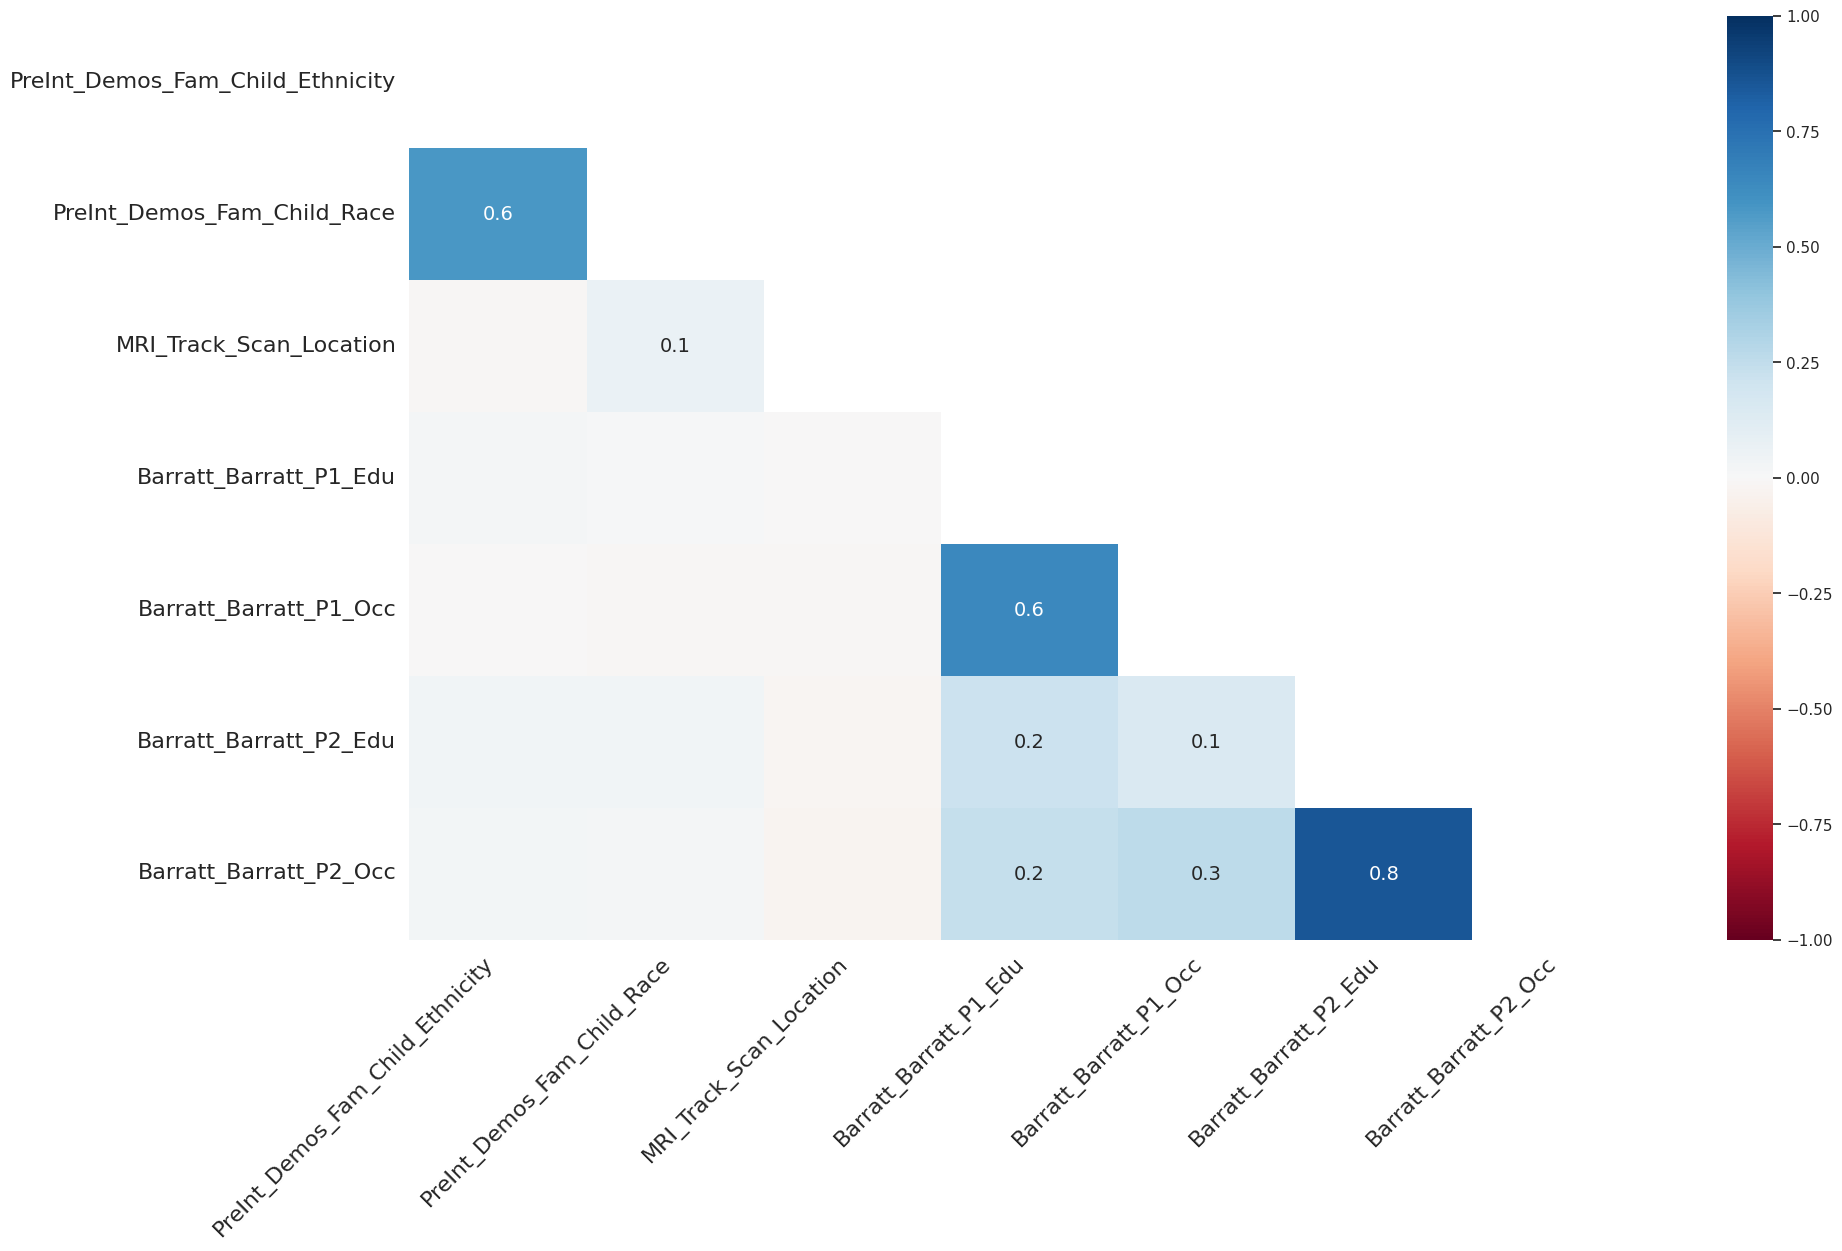

In [20]:
import missingno as msno

msno.heatmap(df)


### 🧮 Barratt Simplified Measure of Social Status

1. The missing values  in Barratt_Barratt_P2_Occ and Barratt_Barratt_P2_Edu has high correlation with 0.8, Barratt_Barratt_P1_Occ and Barratt_Barratt_P1_Edu has high correlation with 0.6. --> MNAR 
   
2. Categorically ordinal but indicated in numeric.

3. The missing values in Barratt_Barratt_P2_Occ are 222(18.3%), Barratt_Barratt_P2_Edu are 198(16.32%), relatively high.

4. The missing values in  Barratt_Barratt_P1_Occ are 31(2.55%),  Barratt_Barratt_P1_Edu are 15(1.24%) --> relatively low.

5. My strategy in filling with missing values: 

6. 

1. Since the missing values in P2_Occ and P2_Edu have a high correlation, which is 0.8, and the percentage of missing values is similar --> may indicate a single-family. --> create a new column first : 

2. For the Partial Missing in P2, deal with the missing values utilizing correlation and predictive modeling.

In [21]:
from sklearn.ensemble import RandomForestClassifier    

def fill_missing_bidirectional(data, col1, col2):
    df_copy = data.copy()   
    missing_col1 = df_copy[col1].isna() & ~df_copy[col2].isna() 
    missing_col2 = df_copy[col2].isna() & ~df_copy[col1].isna()  

    if missing_col1.any(): 
        known_data = df_copy.dropna(subset=[col1, col2]) 
        X = known_data[[col2]].values
        y = known_data[col1].values  
        model = RandomForestClassifier(random_state=42)  
        model.fit(X,y) 
        df_copy.loc[missing_col1, col1] = model.predict(df_copy.loc[missing_col1, [col2]]) 


    if missing_col2.any(): 
        known_data = df_copy.dropna(subset=[col1,col2]) 
        X = known_data[[col1]].values
        y = known_data[col2].values
        model = RandomForestClassifier(random_state=42) 
        model.fit(X, y) 
        df_copy.loc[missing_col2, col2] = model.predict(df_copy.loc[missing_col2, [col1]]) 
        
    return df_copy



df = fill_missing_bidirectional(data = df,  
                                col1 = 'Barratt_Barratt_P2_Occ', 
                                col2 = 'Barratt_Barratt_P2_Edu') 

df = fill_missing_bidirectional(data=df, 
                                col1= 'Barratt_Barratt_P1_Occ', 
                                col2= 'Barratt_Barratt_P1_Edu')   

In [22]:
df['P2_All_Missing'] = (df['Barratt_Barratt_P2_Occ'].isna() 
                         & df['Barratt_Barratt_P2_Edu'].isna()).astype(int) 
df['P1_All_Missing'] = (df['Barratt_Barratt_P1_Occ'].isna() 
                         & df['Barratt_Barratt_P1_Edu'].isna()).astype(int)  

### 🏫 MRI_Track_Scan_Location

In [23]:
loca_mode = df['MRI_Track_Scan_Location'].mode()[0] 
df['MRI_Track_Scan_Location'].fillna(loca_mode, inplace=True)     

###  🧕🏾 Ethnicity & Race

In [24]:
df['PreInt_Demos_Fam_Child_Ethnicity'].fillna(df['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], 
                                             inplace=True)   
df['PreInt_Demos_Fam_Child_Race'].fillna(df['PreInt_Demos_Fam_Child_Race'].mode()[0], 
                                             inplace=True)    

In [25]:
df.isnull().sum() 

EHQ_EHQ_Total                         0
ColorVision_CV_Score                  0
APQ_P_APQ_P_CP                        0
APQ_P_APQ_P_ID                        0
APQ_P_APQ_P_INV                       0
APQ_P_APQ_P_OPD                       0
APQ_P_APQ_P_PM                        0
APQ_P_APQ_P_PP                        0
SDQ_SDQ_Conduct_Problems              0
SDQ_SDQ_Difficulties_Total            0
SDQ_SDQ_Emotional_Problems            0
SDQ_SDQ_Externalizing                 0
SDQ_SDQ_Generating_Impact             0
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Internalizing                 0
SDQ_SDQ_Peer_Problems                 0
SDQ_SDQ_Prosocial                     0
MRI_Track_Age_at_Scan                 0
Basic_Demos_Enroll_Year               0
Basic_Demos_Study_Site                0
PreInt_Demos_Fam_Child_Ethnicity      0
PreInt_Demos_Fam_Child_Race           0
MRI_Track_Scan_Location               0
Barratt_Barratt_P1_Edu               14
Barratt_Barratt_P1_Occ               14


In [26]:
fig = px.scatter_matrix(data_frame=df, 
                        dimensions= ['ColorVision_CV_Score', 'ADHD_Outcome']) 

fig.update_traces(diagonal_visible=False) 
fig.show() 

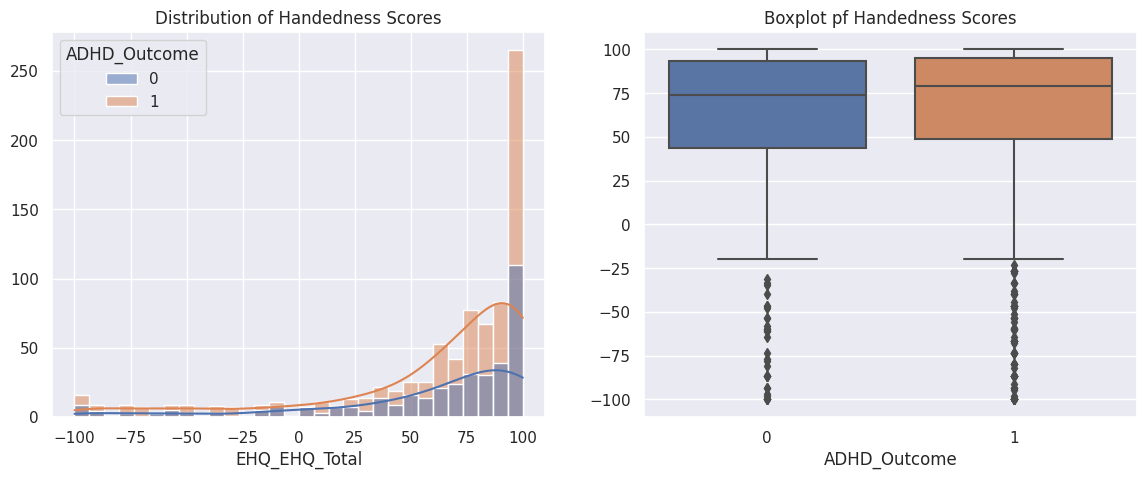

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(14, 5)) 

sns.histplot(data = df,
             x = 'EHQ_EHQ_Total', 
             bins=30,
             kde=True,
             hue='ADHD_Outcome', 
             ax = ax1) 

ax1.set_title('Distribution of Handedness Scores') 
ax1.set_ylabel('')


sns.boxplot(data=df,
            x='ADHD_Outcome', 
            y='EHQ_EHQ_Total',
            ax=ax2)   

ax2.set_title('Boxplot pf Handedness Scores') 
ax2.set_ylabel('')


plt.show() 

# 🎥   ***Data Visualization***    

### **1️⃣ Distribution of ADHD**   

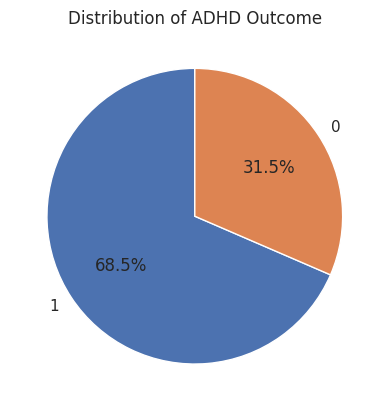

In [28]:
df['ADHD_Outcome'].value_counts().plot(kind='pie',
                                       autopct='%1.1f%%',
                                       startangle=90)  

plt.ylabel('')
plt.title('Distribution of ADHD Outcome') 
plt.show() 

 ####  2️⃣ ***SDQ(mean) by ADHD Outcome***  

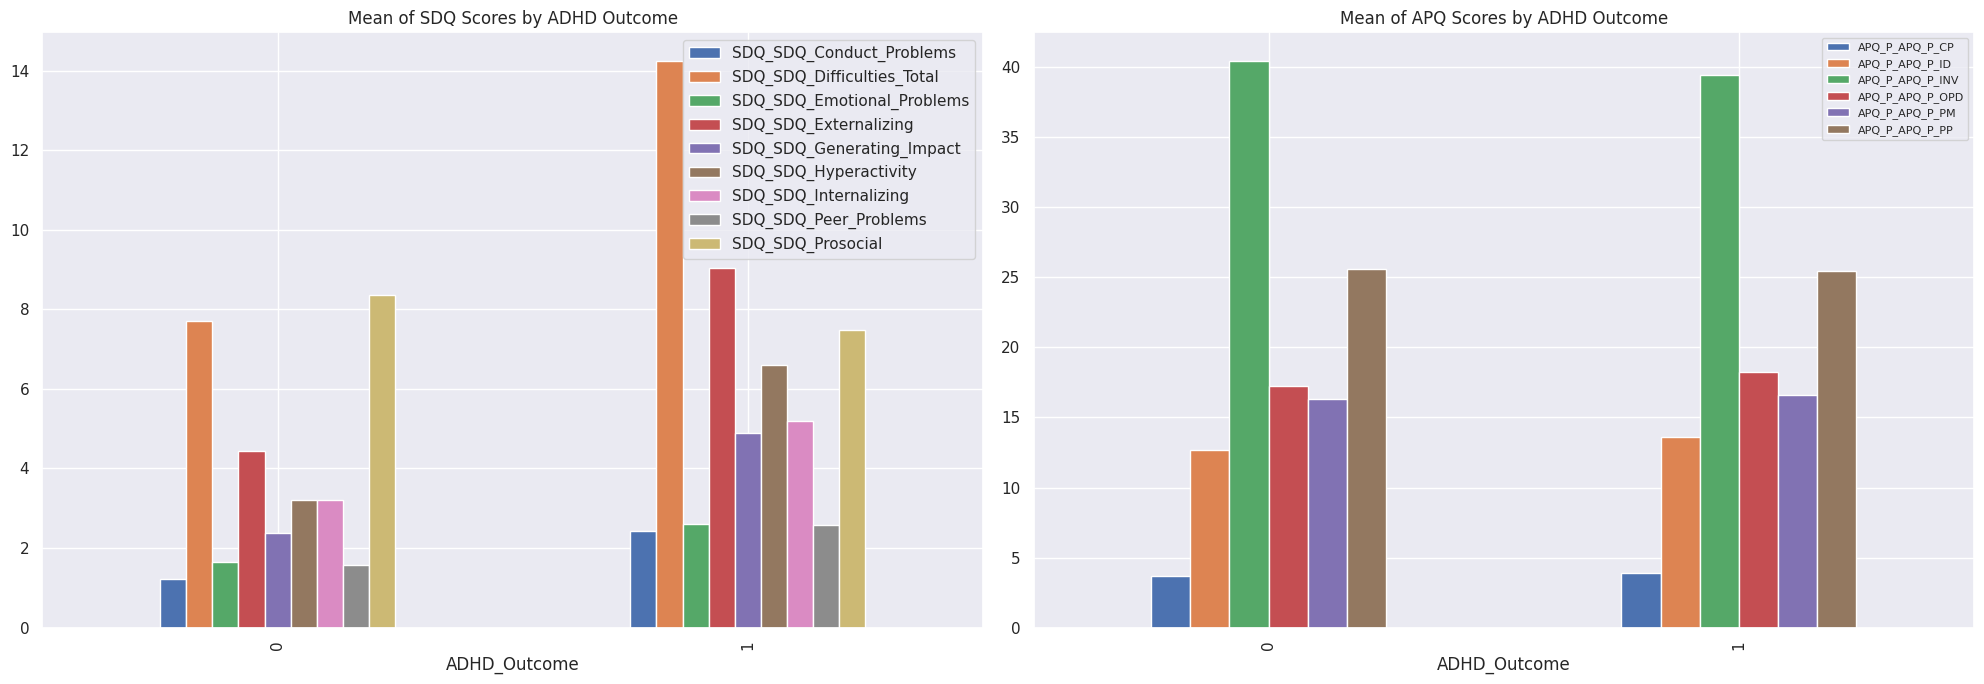

In [29]:
SDQ_cols = [col for col in df.columns if col.startswith('SDQ')]
APQ_cols = [col for col in df.columns if col.startswith('APQ')] 


fig, (ax1, ax2) = plt.subplots(1,2,
                              figsize=(20,7)) 

df.groupby('ADHD_Outcome')[SDQ_cols].mean().plot(kind='bar',
                                                 ax =ax1,
                                                 title='Mean of SDQ Scores by ADHD Outcome')


df.groupby('ADHD_Outcome')[APQ_cols].mean().plot(kind='bar',
                                                 ax =ax2,
                                                 title='Mean of APQ Scores by ADHD Outcome') 


plt.tight_layout() 
plt.legend(fontsize=8)
plt.show() 


 ####  3️⃣ ***Countplot of SDQ by ADHD Outcome + Boxplot by Outcome & Sex***  

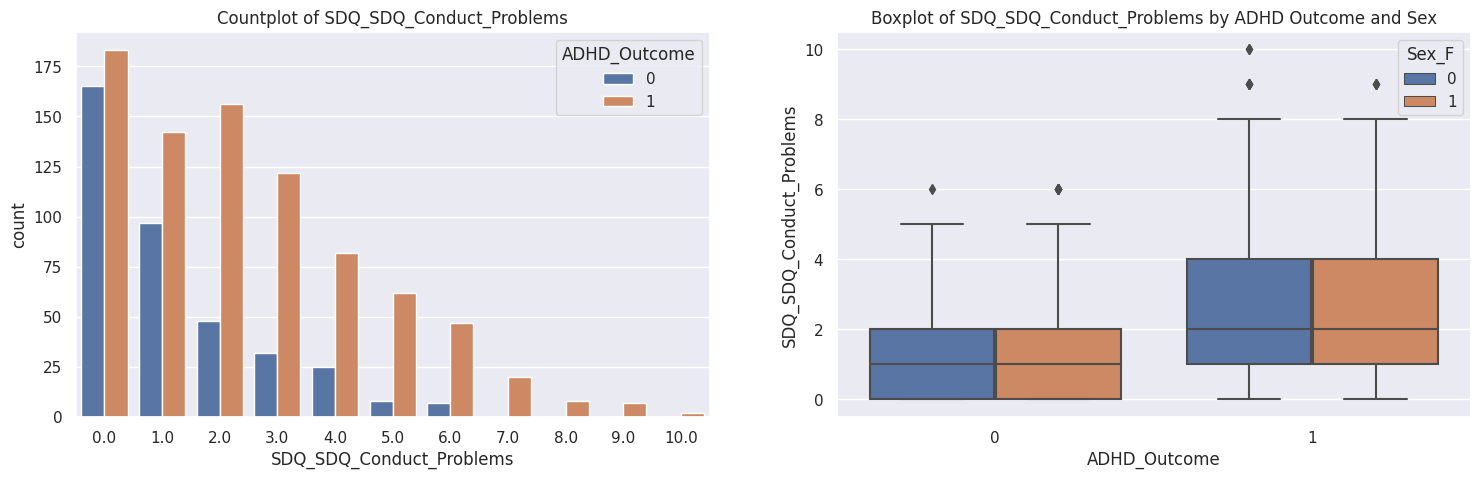

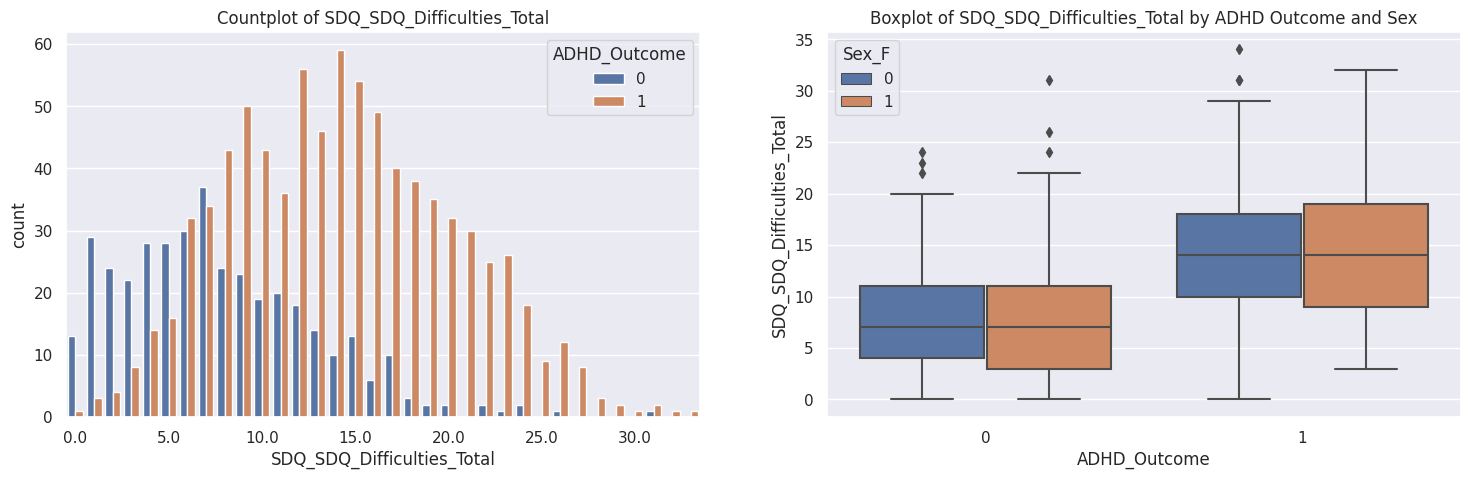

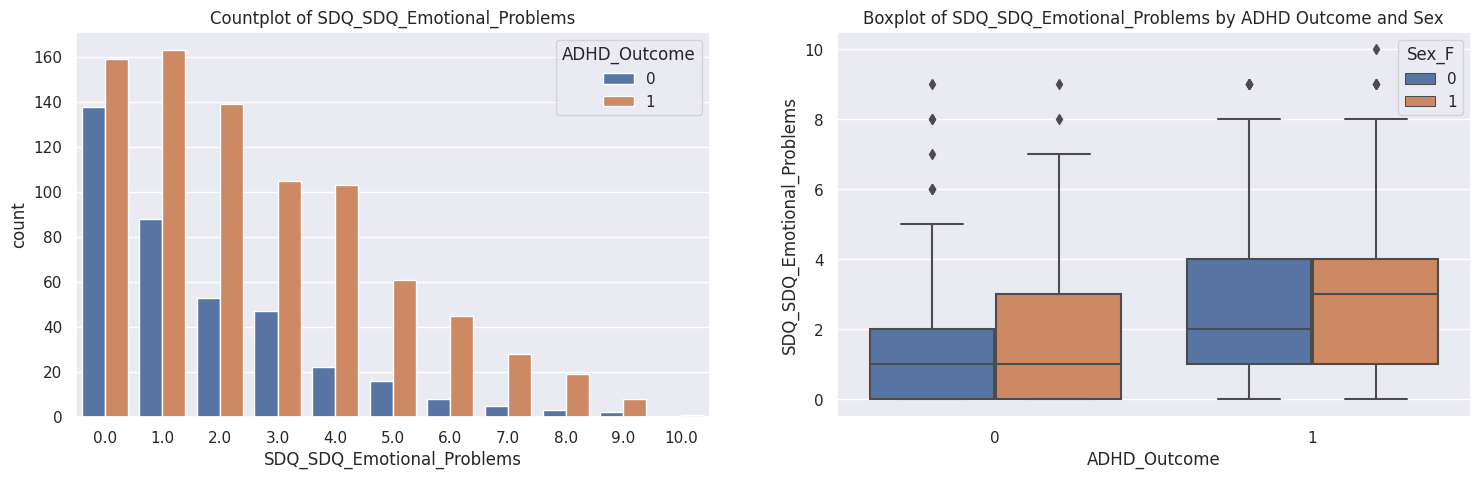

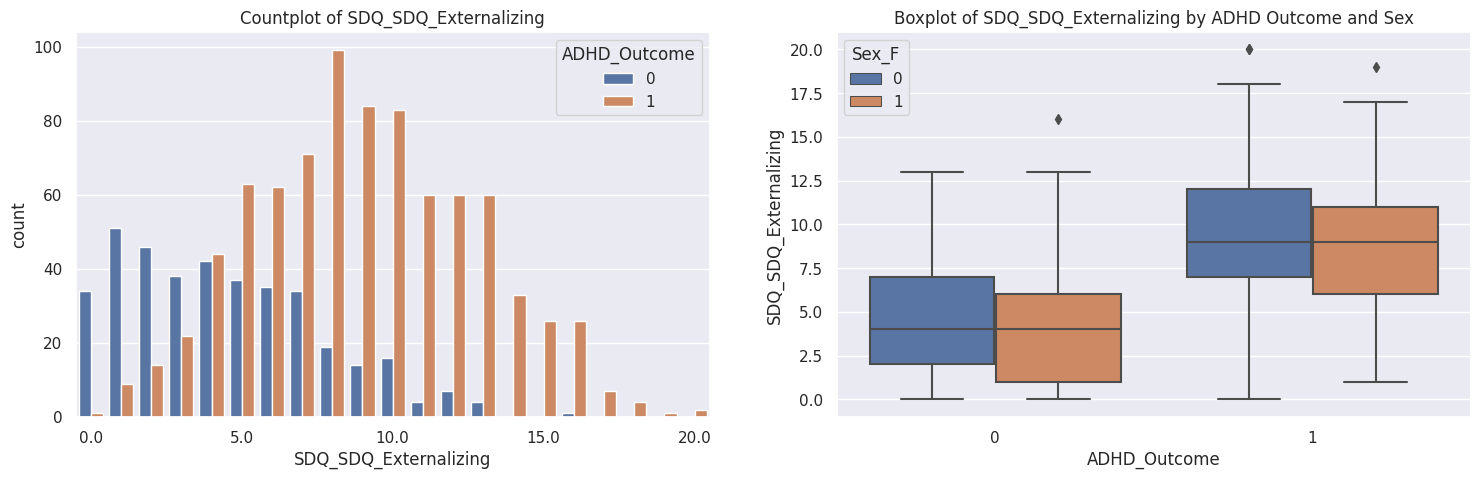

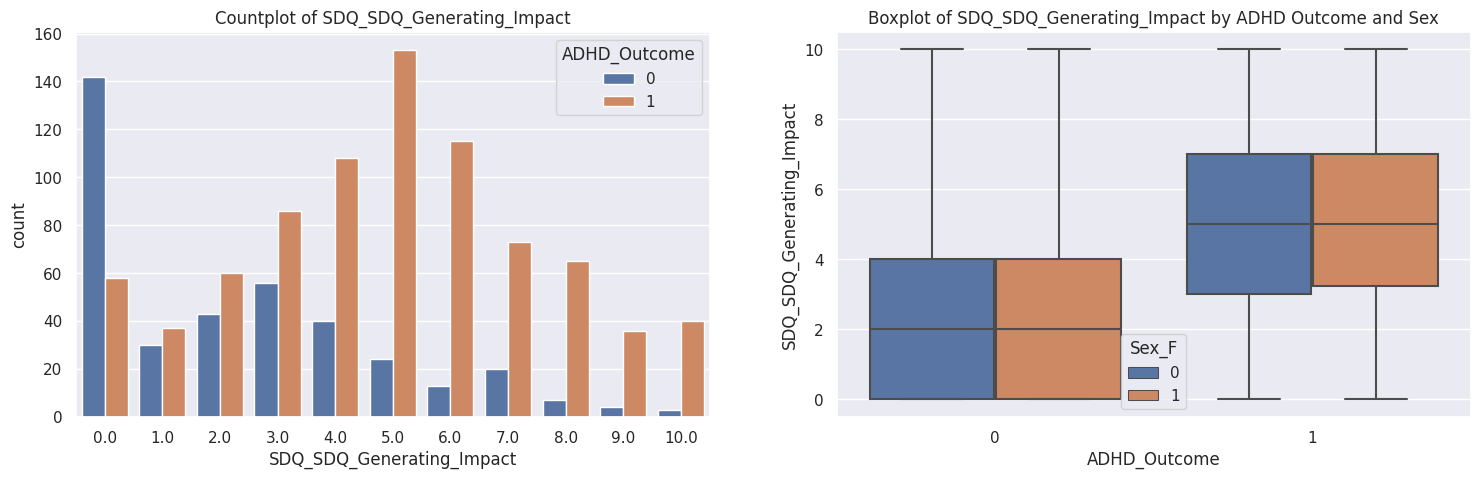

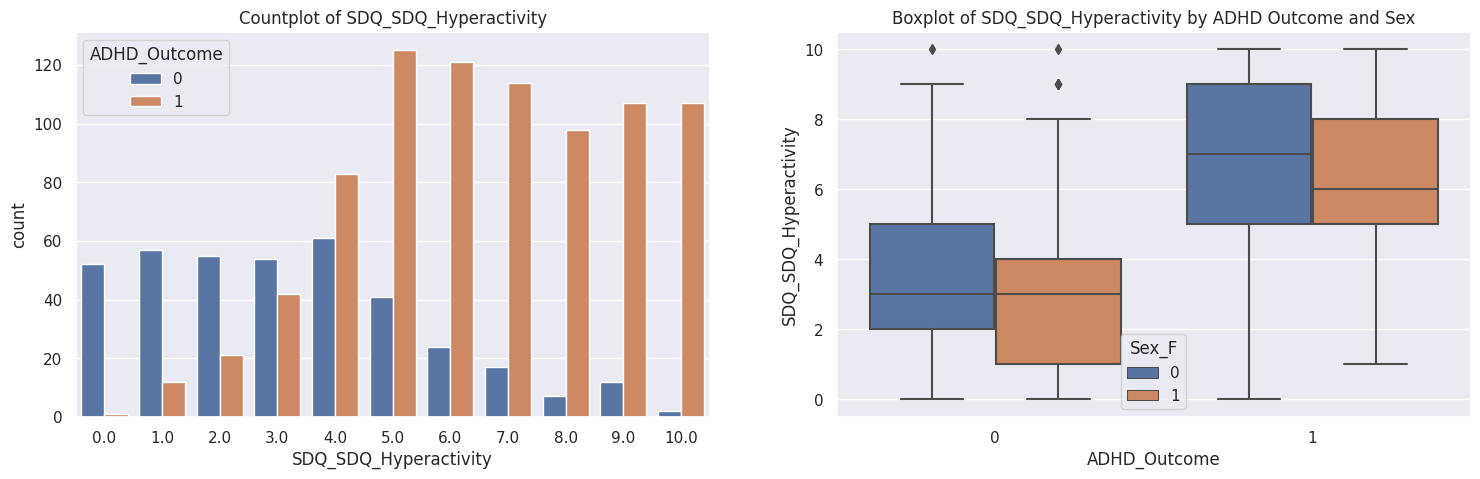

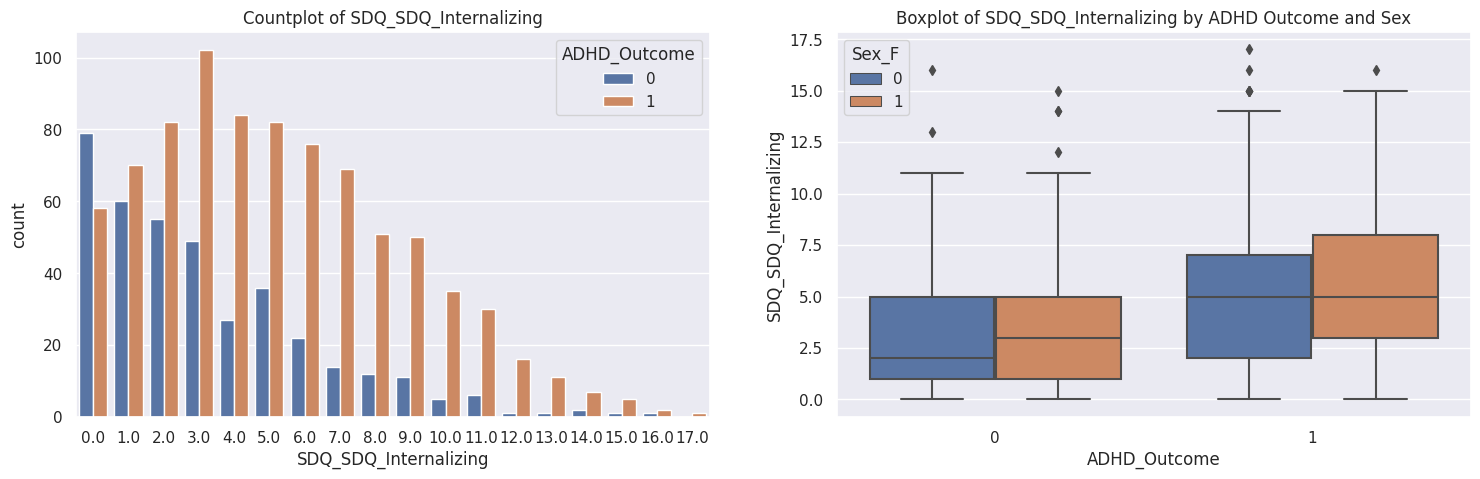

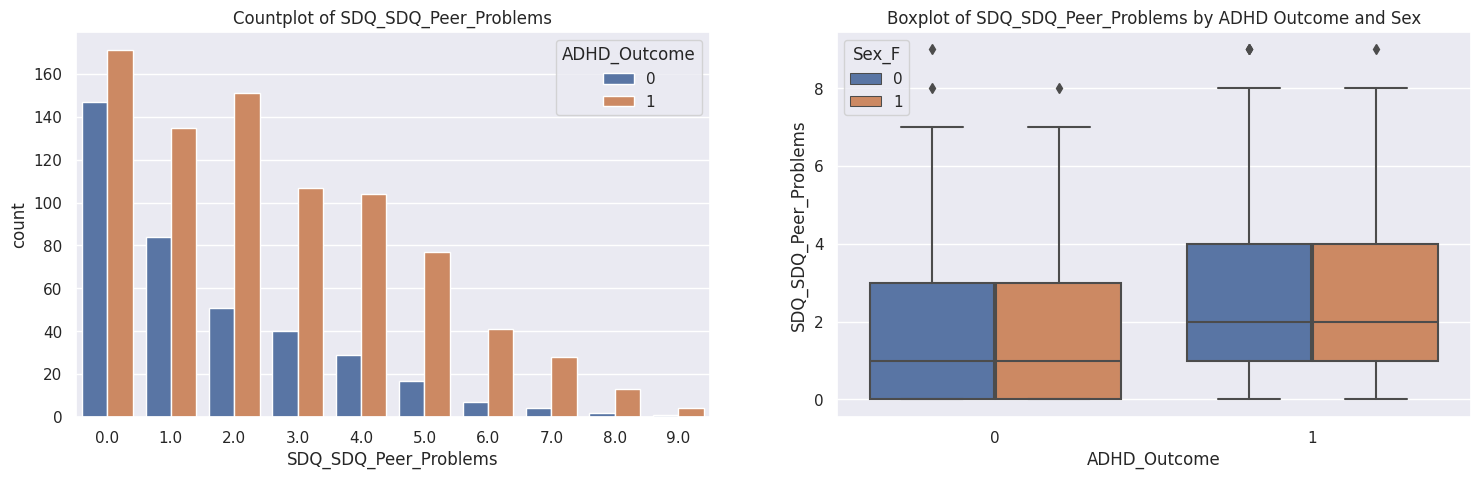

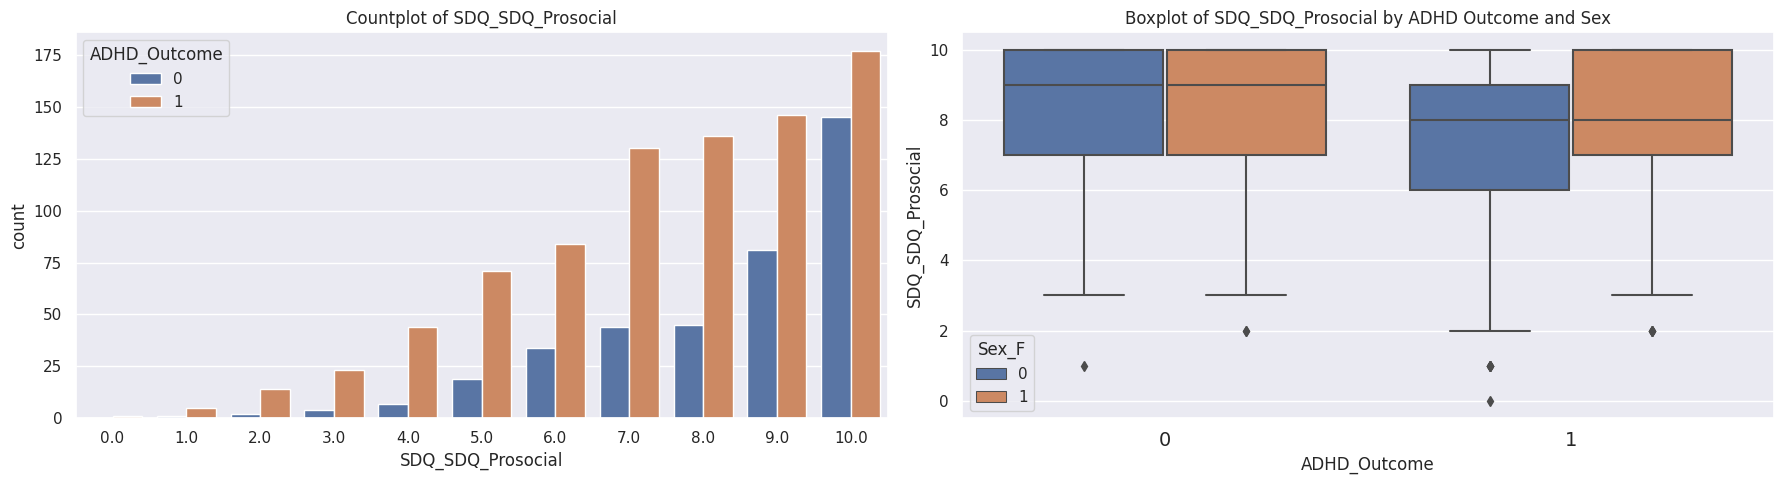

In [30]:
SDQ_cols = [col for col in df.columns if col.startswith('SDQ')]    
target_vars = ['ADHD_Outcome', 'Sex_F'] 


for i, col in enumerate(SDQ_cols):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5)) 
    sns.countplot(data=df,
                  x=col, 
                  hue=target_vars[0],
                  ax=ax1) 
    ax1.set_title(f'Countplot of {col}')
    
    max_val = df[col].max() 
    if max_val >=20:
        step=5 if max_val<=50 else 10
        ax1.set_xticks(range(0, int(max_val+1), step)) 
        
    sns.boxplot(data=df,
                y = col,
                x = target_vars[0], 
                hue= target_vars[1],  
                ax=ax2)   
    ax2.set_title(f'Boxplot of {col} by ADHD Outcome and Sex') 

plt.xticks(fontsize=14)
plt.tight_layout() 
plt.show() 

 ####  3️⃣ ***Correlation with ADHD***   

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'SDQ_SDQ_Prosocial'),
  Text(1, 0, 'SDQ_SDQ_Emotional_Problems'),
  Text(2, 0, 'SDQ_SDQ_Peer_Problems'),
  Text(3, 0, 'SDQ_SDQ_Internalizing'),
  Text(4, 0, 'SDQ_SDQ_Conduct_Problems'),
  Text(5, 0, 'SDQ_SDQ_Generating_Impact'),
  Text(6, 0, 'SDQ_SDQ_Difficulties_Total'),
  Text(7, 0, 'SDQ_SDQ_Externalizing'),
  Text(8, 0, 'SDQ_SDQ_Hyperactivity')])

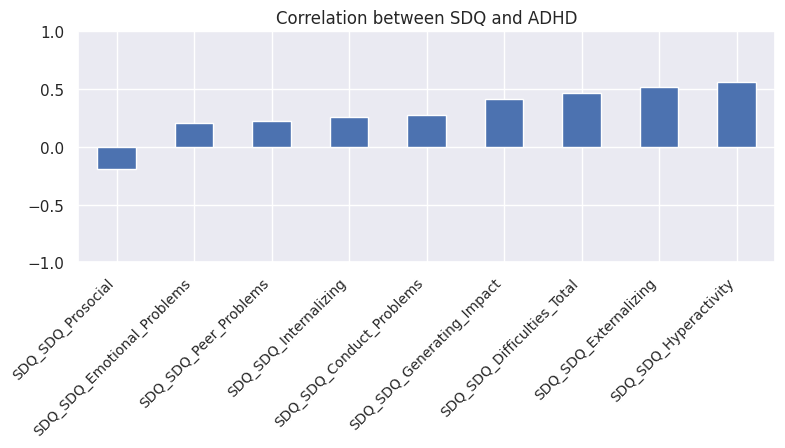

In [31]:
corr_SDQ_ADHD = df[SDQ_cols + ['ADHD_Outcome']].corr()['ADHD_Outcome'].drop('ADHD_Outcome').sort_values()  

fig = plt.figure(figsize=(9,3))
corr_SDQ_ADHD.plot(kind='bar')  

plt.title('Correlation between SDQ and ADHD')
plt.ylim(-1,1)
plt.xticks(rotation=45, 
           ha='right',
           fontsize=10)

### 📝 **Summary:**  

1. Hyperactivity has a strong correlation with ADHD. 
   
2. Externalizing has a moderate correlation with ADHD. 

### 🔍 **2. Alabama Parenting Questionnaire (APQ)**  

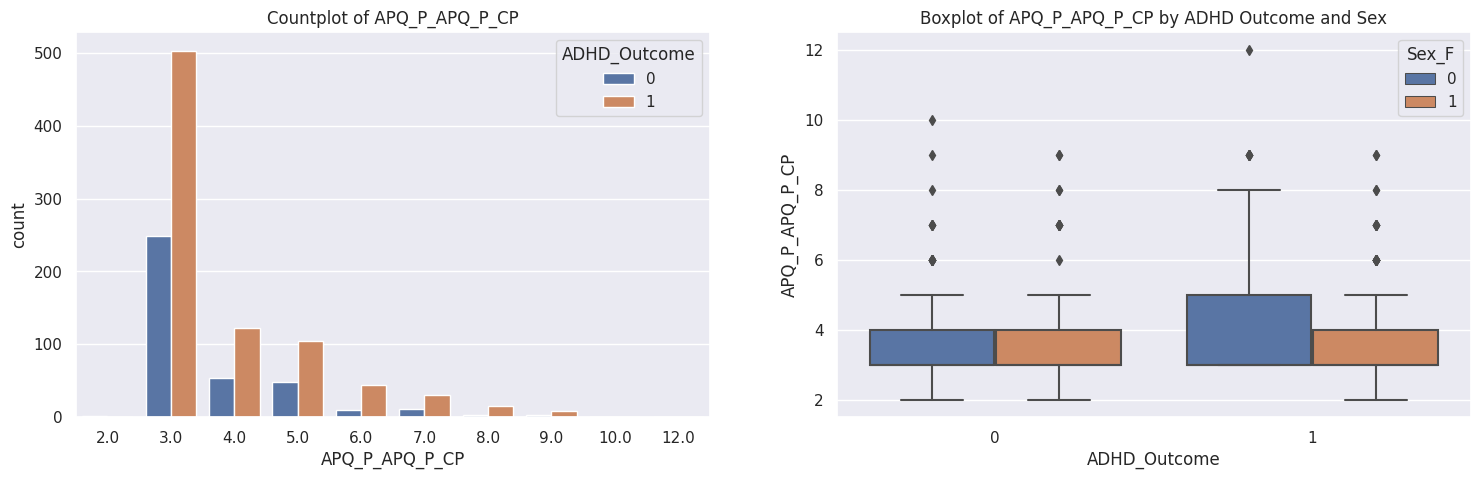

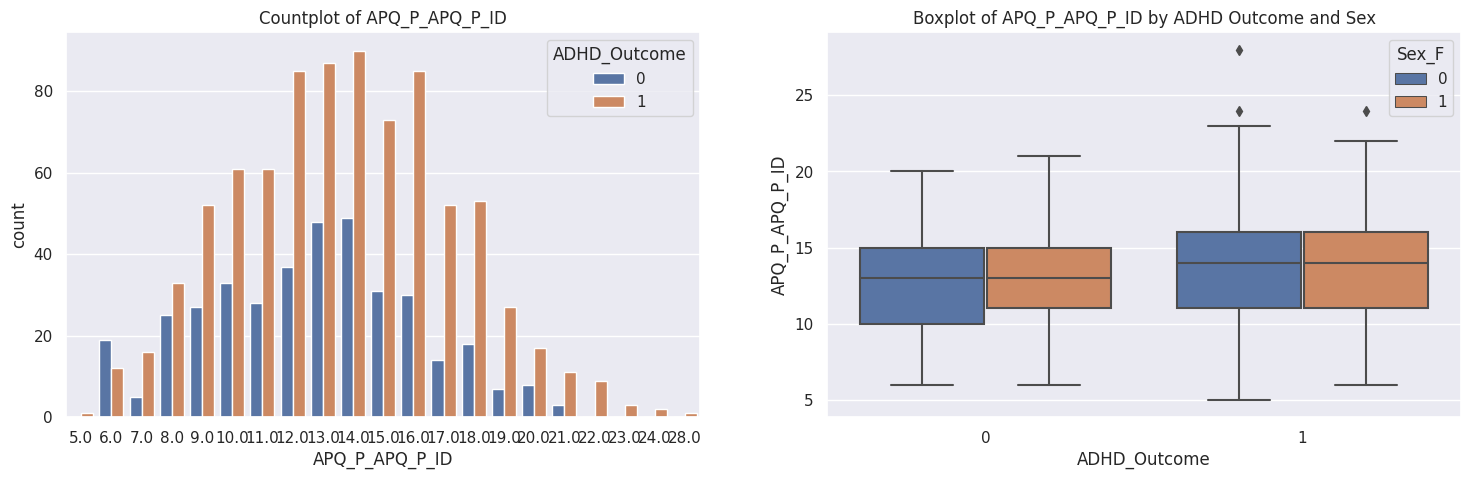

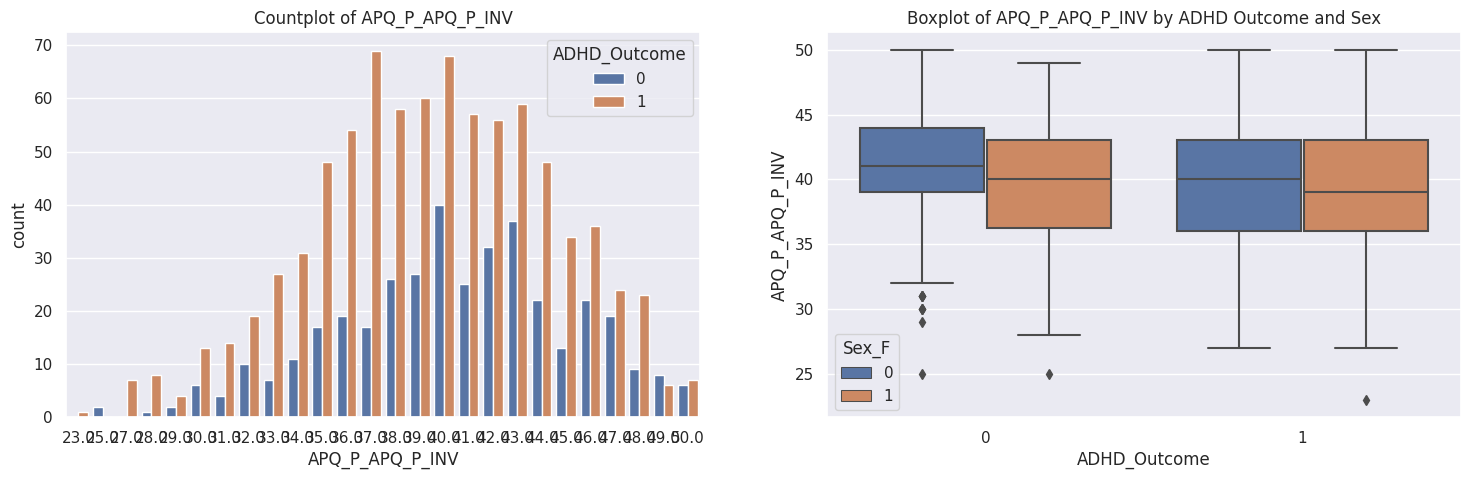

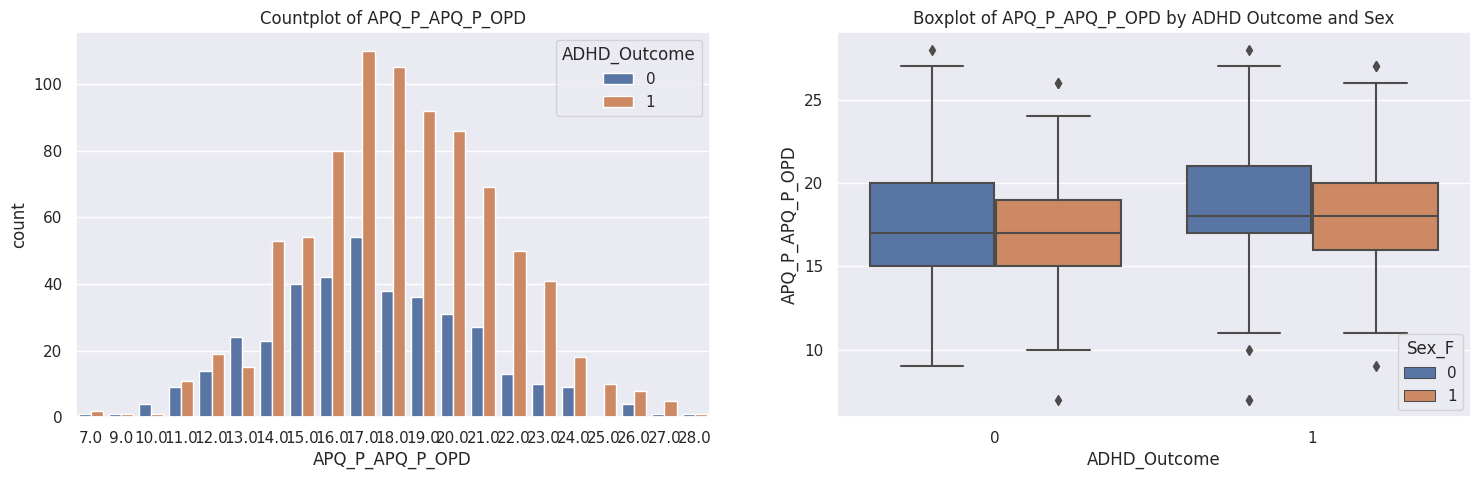

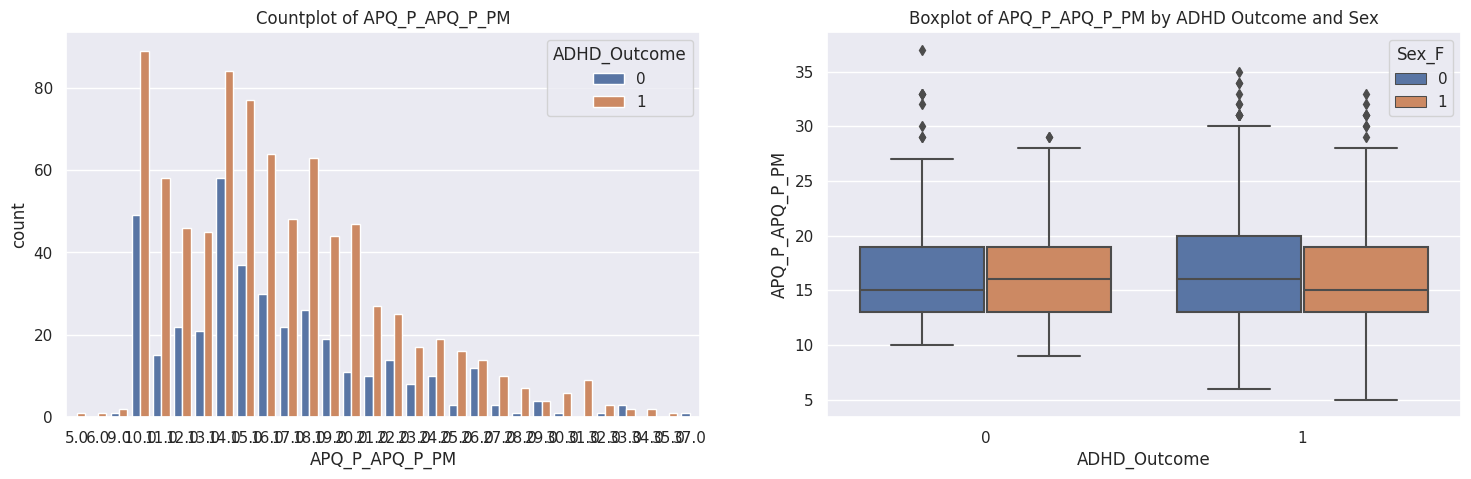

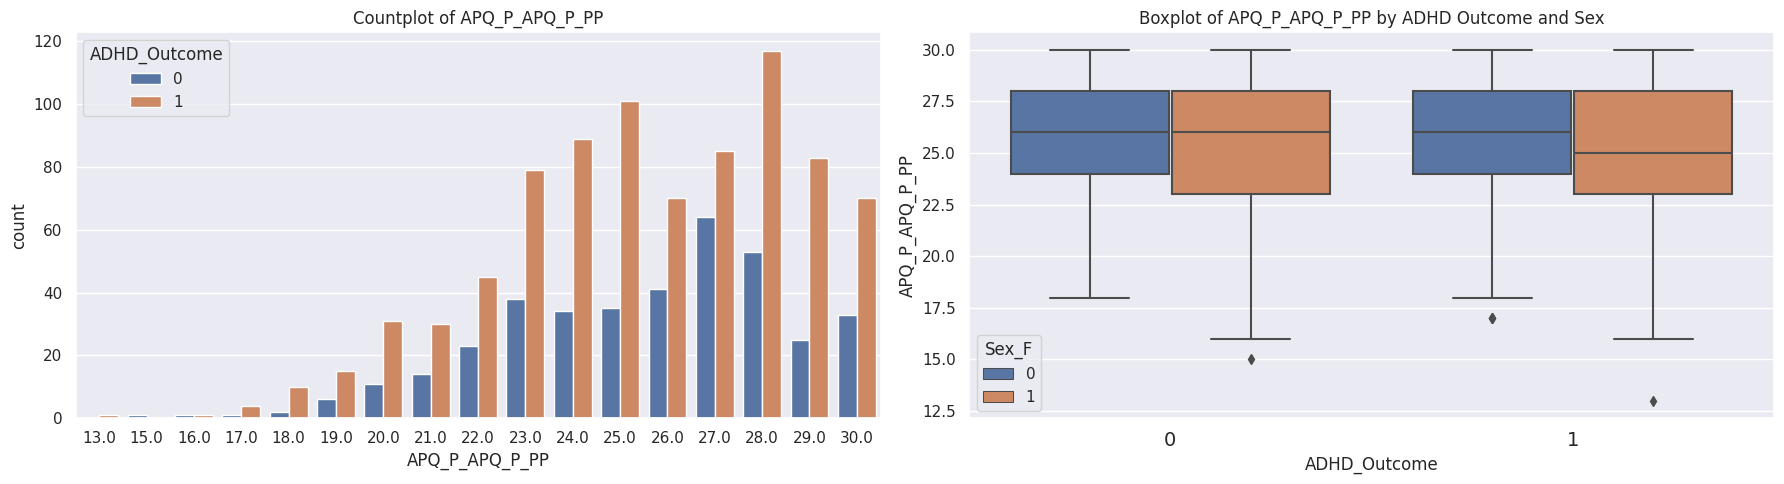

In [32]:
APQ_cols = [col for col in df.columns if col.startswith('APQ')]  
target_vars = ['ADHD_Outcome', 'Sex_F'] 


for i, col in enumerate(APQ_cols): 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5)) 
    
    sns.countplot(data=df,
                  x=col, 
                  hue=target_vars[0],
                  ax=ax1) 
    ax1.set_title(f'Countplot of {col}')
        
        
    sns.boxplot(data=df, 
                y = col,
                x = target_vars[0],  
                hue= target_vars[1],   
                ax=ax2)    
    ax2.set_title(f'Boxplot of {col} by ADHD Outcome and Sex') 

plt.xticks(fontsize=14)
plt.tight_layout() 
plt.show()  

### 📝 **Summary:**   

1. ...
2. ...
3. 

### 🔍 **3. Clinical Measurements**   

**1.Edinburgh Handedness Questionnaire**

**2.Ishihara Color Test**

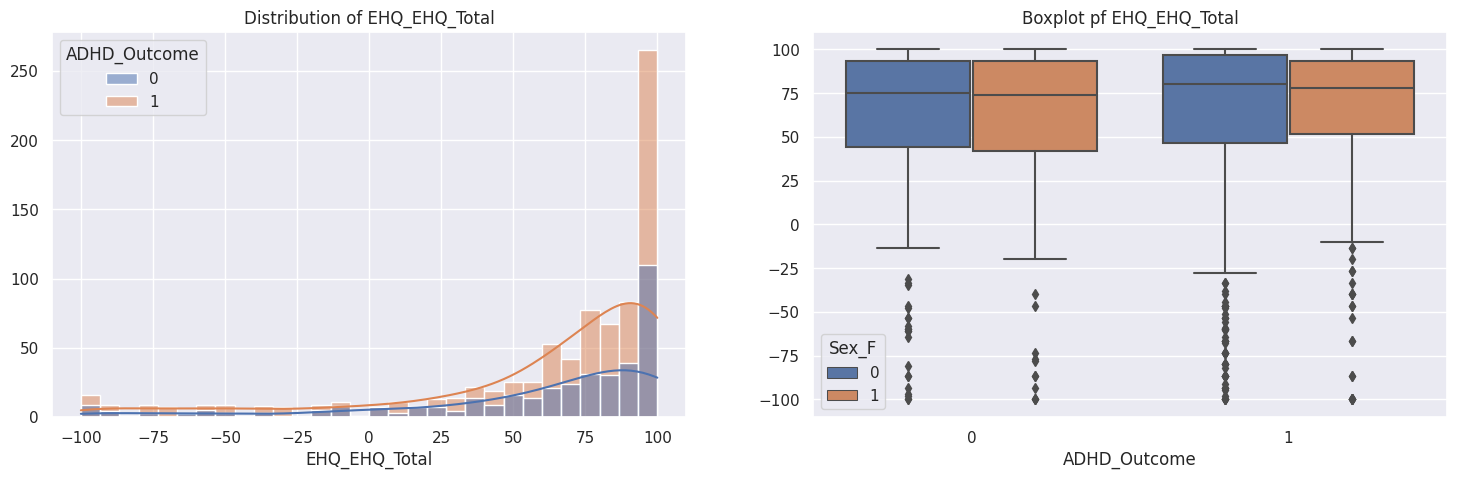

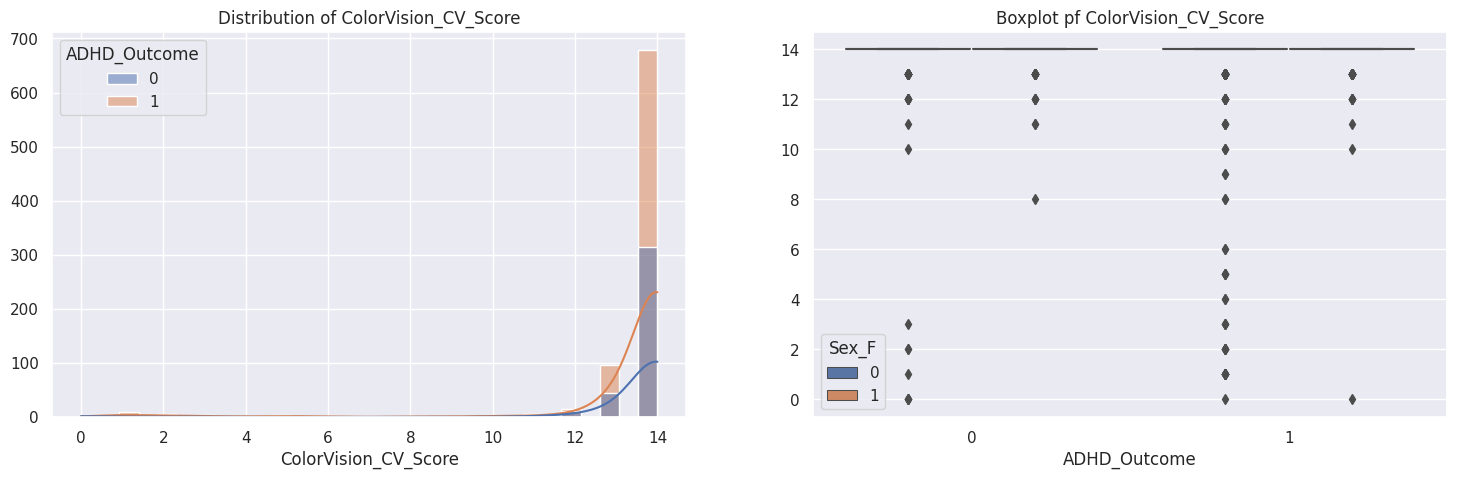

In [33]:
clinical_cols = ['EHQ_EHQ_Total', 'ColorVision_CV_Score'] 

for i, col in enumerate(clinical_cols):
    fig, (ax1, ax2) = plt.subplots(1, 2, 
                                   figsize=(18, 5)) 
    sns.histplot(data = df,
             x = col, 
             bins=30,
             kde=True,
             hue='ADHD_Outcome', 
             ax = ax1) 
    ax1.set_title(f'Distribution of {col}')  
    ax1.set_ylabel('')


    sns.boxplot(data=df,
                x='ADHD_Outcome', 
                y=col,
                hue='Sex_F', 
                ax=ax2)   

    ax2.set_title(f'Boxplot pf {col}')  
    ax2.set_ylabel('')


plt.show() 